# Sales Forecasting - Data Exploration

This notebook explores the Superstore Sales Dataset to understand patterns, trends, and data quality.

## Objectives
- Load and inspect the dataset
- Analyze sales distribution and patterns
- Identify seasonality and trends
- Check data quality
- Visualize key insights

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src to path
current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
# Also check if running from root
if os.path.exists('src') and os.path.abspath('src') not in sys.path:
    sys.path.append(os.path.abspath('src'))

# Import custom modules
try:
    from data_preprocessing import load_data, explore_data, validate_data_quality
except ImportError as e:
    print(f'Error importing data_preprocessing: {e}')
    print(f'sys.path: {sys.path}')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print('✅ Libraries imported successfully')

✅ Libraries imported successfully


## 1. Load Dataset

Load the Superstore Sales Dataset from the data/raw directory.

In [2]:
# Load data
df = load_data('../data/processed/Sample - Superstore.csv')

# Display first few rows
df.head()

✅ Successfully loaded data: 9994 rows, 21 columns


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Data Overview

Examine the structure, data types, and basic statistics.

In [3]:
# Explore data
explore_data(df)


DATASET OVERVIEW

Shape: (9994, 21)

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

------------------------------------------------------------
DATA TYPES
------------------------------------------------------------
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

-------------------

In [4]:
# Check unique values in key columns
print('Unique Categories:', df['Category'].unique())
print('Unique Regions:', df['Region'].unique())
print('Unique Segments:', df['Segment'].unique())

Unique Categories: ['Furniture' 'Office Supplies' 'Technology']
Unique Regions: ['South' 'West' 'Central' 'East']
Unique Segments: ['Consumer' 'Corporate' 'Home Office']


## 3. Sales Analysis

Analyze sales patterns and distributions.

In [5]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Basic sales statistics
print('Sales Statistics:')
print(f'Total Sales: ${df["Sales"].sum():,.2f}')
print(f'Average Sale: ${df["Sales"].mean():,.2f}')
print(f'Median Sale: ${df["Sales"].median():,.2f}')
print(f'Min Sale: ${df["Sales"].min():,.2f}')
print(f'Max Sale: ${df["Sales"].max():,.2f}')

Sales Statistics:
Total Sales: $2,297,200.86
Average Sale: $229.86
Median Sale: $54.49
Min Sale: $0.44
Max Sale: $22,638.48


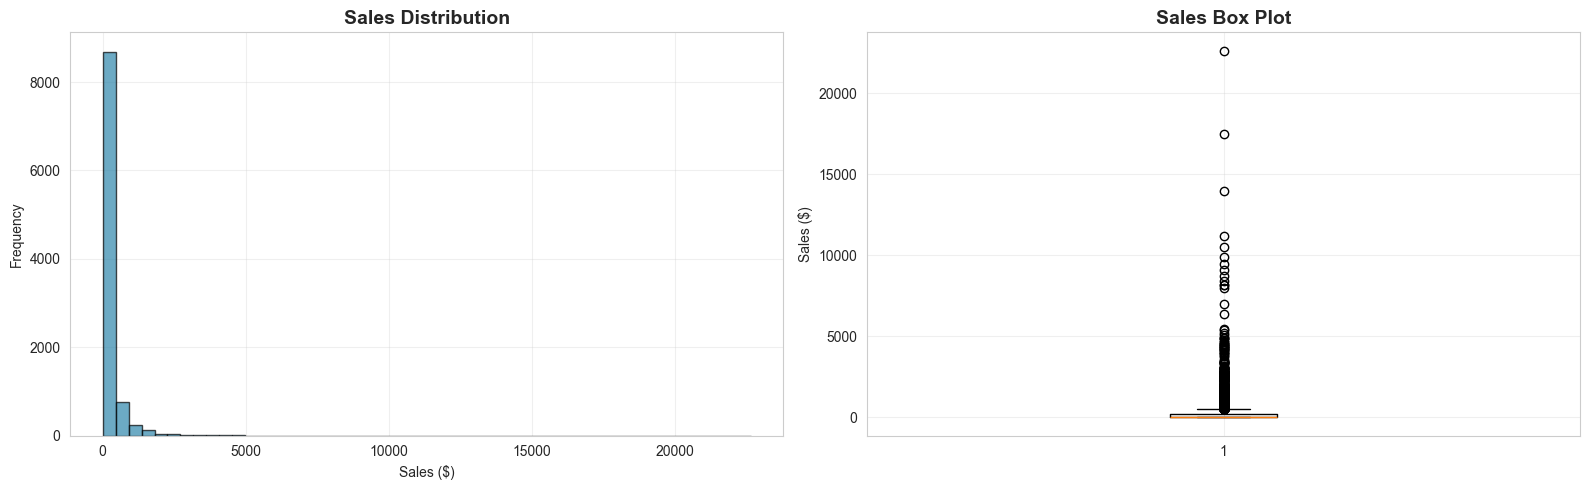

In [6]:
# Sales distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df['Sales'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Sales'], vert=True)
axes[1].set_title('Sales Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Time Series Analysis

Analyze sales over time to identify trends and seasonality.

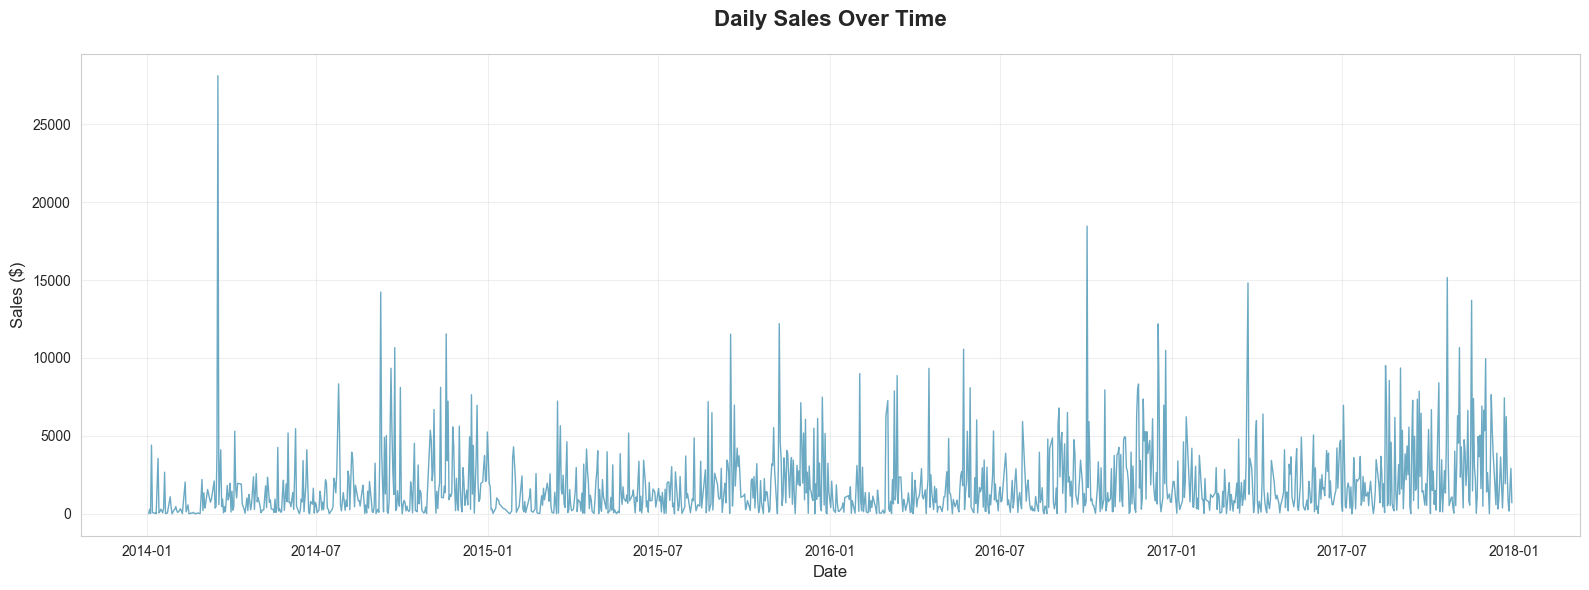

Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
Total Days: 1237


In [7]:
# Aggregate sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().sort_index()

# Plot daily sales
plt.figure(figsize=(16, 6))
plt.plot(daily_sales.index, daily_sales.values, linewidth=1, color='#2E86AB', alpha=0.7)
plt.title('Daily Sales Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Date Range: {daily_sales.index.min()} to {daily_sales.index.max()}')
print(f'Total Days: {len(daily_sales)}')

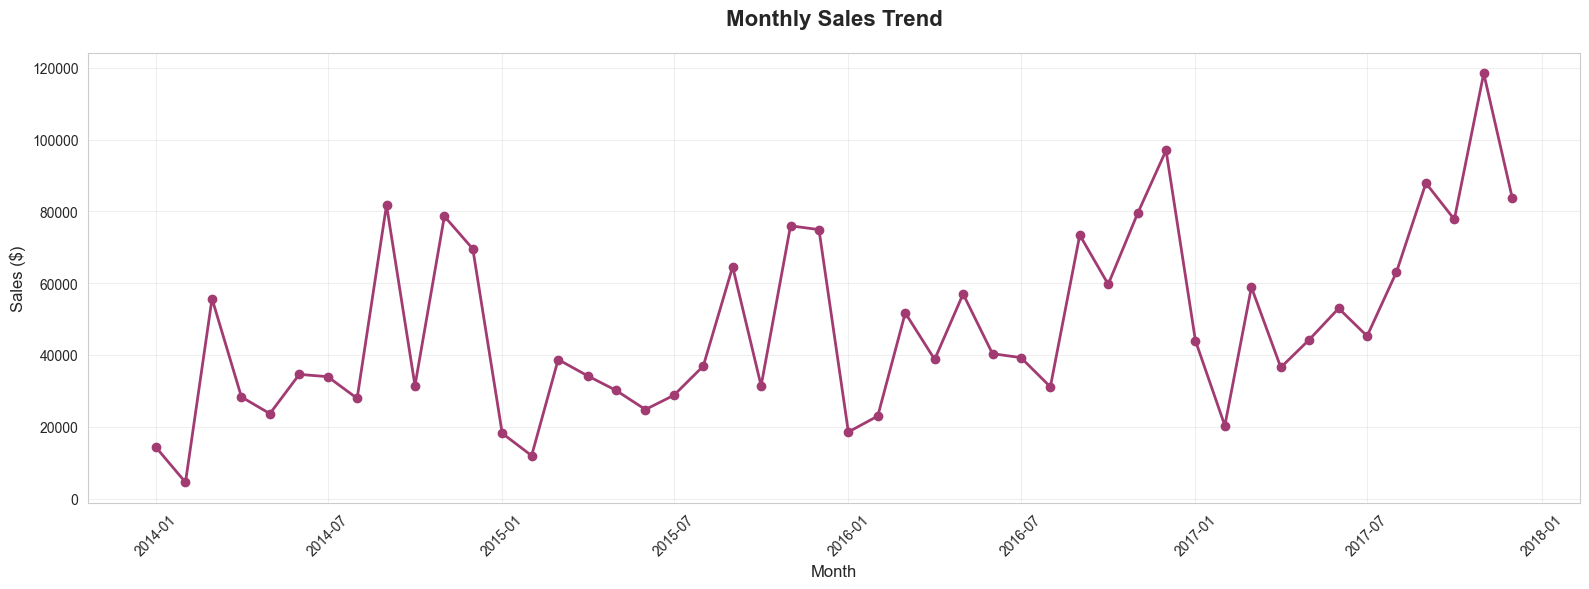

In [8]:
# Monthly sales trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(16, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, 
         color='#A23B72', markersize=6)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Category Analysis

Compare sales across different categories.

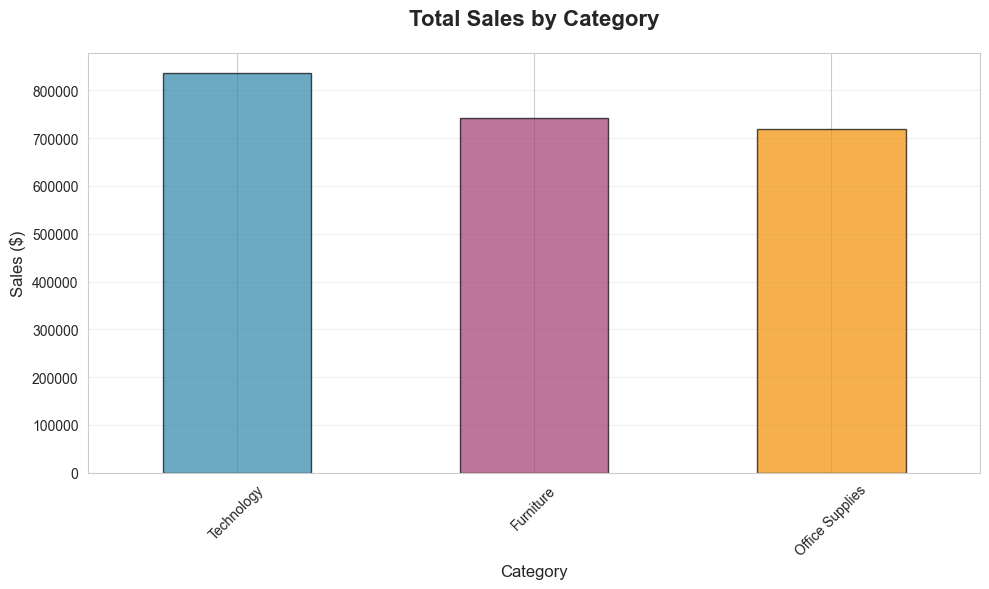


Sales by Category:
Technology: $836,154.03
Furniture: $741,999.80
Office Supplies: $719,047.03


In [9]:
# Sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color=['#2E86AB', '#A23B72', '#F18F01'], 
                    alpha=0.7, edgecolor='black')
plt.title('Total Sales by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('\nSales by Category:')
for cat, sales in category_sales.items():
    print(f'{cat}: ${sales:,.2f}')

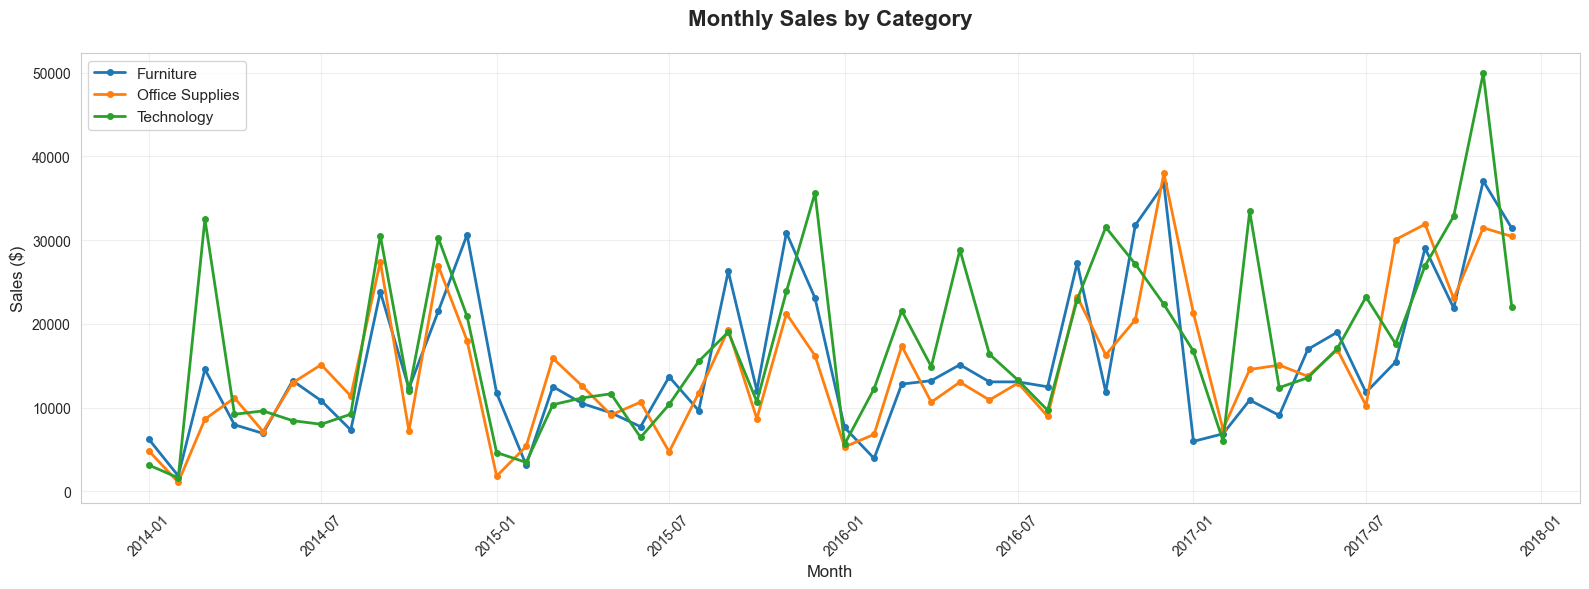

In [10]:
# Category sales over time
fig, ax = plt.subplots(figsize=(16, 6))

for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    cat_monthly = cat_data.groupby(cat_data['Order Date'].dt.to_period('M'))['Sales'].sum()
    cat_monthly.index = cat_monthly.index.to_timestamp()
    ax.plot(cat_monthly.index, cat_monthly.values, label=category, linewidth=2, marker='o', markersize=4)

ax.set_title('Monthly Sales by Category', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Sales ($)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Regional Analysis

Compare sales across different regions.

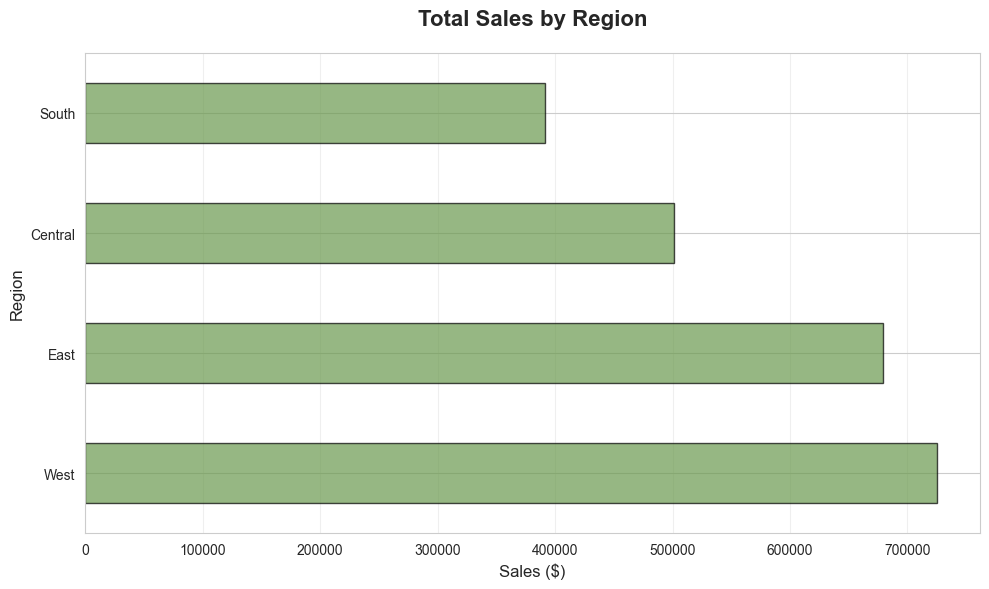

In [11]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='barh', color='#6A994E', alpha=0.7, edgecolor='black')
plt.title('Total Sales by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Seasonality Analysis

Identify seasonal patterns in sales.

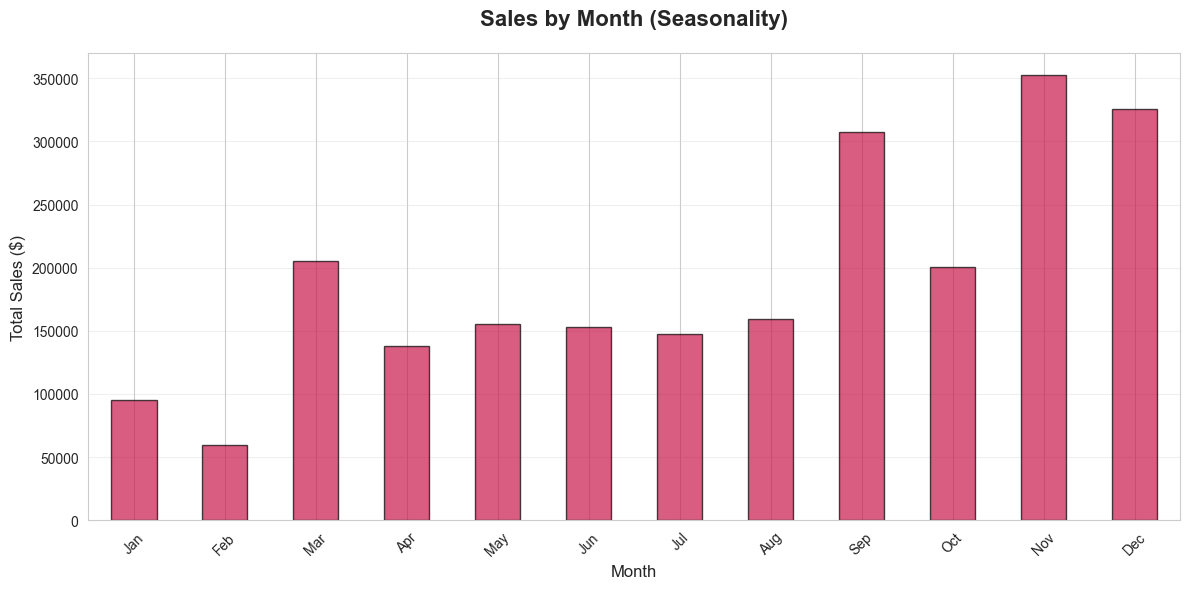

In [12]:
# Sales by month of year
df['Month'] = df['Order Date'].dt.month
monthly_pattern = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_pattern.plot(kind='bar', color='#C9184A', alpha=0.7, edgecolor='black')
plt.title('Sales by Month (Seasonality)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Data Quality Check

Validate data quality before proceeding to modeling.

In [13]:
# Validate data quality
is_valid = validate_data_quality(df)

if is_valid:
    print('\n✅ Data is ready for modeling!')
else:
    print('\n⚠️  Data quality issues detected. Review and clean data.')


DATA QUALITY CHECK
Duplicate Rows: 0
Total Missing Values: 0

✅ Data quality check completed.

✅ Data is ready for modeling!


## Key Insights

**Summary of findings:**
- Dataset contains 4 years of sales data (2014-2017)
- Clear seasonal patterns observed (peak in Nov-Dec)
- Category performance varies significantly
- Regional differences in sales volume
- Data quality is good with minimal missing values

**Next Steps:**
- Prepare data for time series forecasting
- Engineer time-based features
- Build and compare forecasting models